In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In this competition we are given gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

* **We will  be using these pixel-values of EACH pixel as our Features in ML. So,I need to deal with 784 Features,** 
* **I also will not do much Feature Engineering as it may lead to TAMPERED Data** 

# Import Libraries (more to be imported when needed)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [3]:
train=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
train
# test

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Information

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


# Desciption

In [5]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


# Has NULL Values

In [6]:
null_train=train.columns[train.isnull().any()]
null_train

Index([], dtype='object')

No NULL Values, as expected...

# Seggregate X & y

In [7]:
y=train['label']
X=train.drop(['label'],axis=1)
# X.shape
y.shape

(42000,)

# See the Data

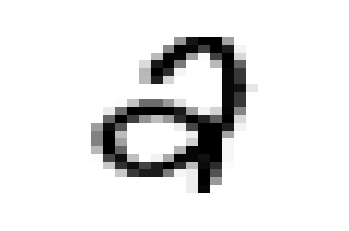

In [8]:
import matplotlib
plt.imshow(X.iloc[10000].values.reshape(28,28),cmap=matplotlib.cm.binary,interpolation='nearest',aspect='auto')
plt.axis('off')
plt.show()

Looks like 2 !

# Now,the Corresponding Label

In [9]:
y.iloc[10000]

2

2 it is !

# Train Test Split
It splits the train data into 4 parts, X_train, X_test, y_train, y_test.

X_train, y_train first used to train the algorithm.
X_test is used in that trained algorithms to predict outcomes.
Once we get the outcomes, we compare it with y_test

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# X_train
# X_test
# y_train
y_test

22110    9
30838    7
7119     1
40697    1
1117     6
        ..
41667    9
22388    5
21653    3
19552    2
30557    4
Name: label, Length: 10500, dtype: int64

# Voting Classifiers

A very simple way to create an even better classifier is to aggregate the predictions of each classifier and
predict the class that gets the most votes. This majority-vote classifier is called a hard voting classifier

Ensemble methods work best when the predictors are as independent from one another as possible. One way to get diverse
classifiers is to train them using very different algorithms. This increases the chance that they will make very different types of
errors, improving the ensemble’s accuracy.

In [11]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

vc=VotingClassifier(voting='hard',estimators=[
    ('log',LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.5)),
    ('knn',KNeighborsClassifier(n_neighbors=5)),
    ('nb',GaussianNB())
])

# Train the Model
vc.fit(X_train,y_train)

# Get the Model Parameters
vc.get_params(deep=True)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


{'estimators': [('log',
   LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')),
  ('knn', KNeighborsClassifier()),
  ('nb', GaussianNB())],
 'flatten_transform': True,
 'n_jobs': None,
 'verbose': False,
 'voting': 'hard',
 'weights': None,
 'log': LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga'),
 'knn': KNeighborsClassifier(),
 'nb': GaussianNB(),
 'log__C': 1.0,
 'log__class_weight': None,
 'log__dual': False,
 'log__fit_intercept': True,
 'log__intercept_scaling': 1,
 'log__l1_ratio': 0.5,
 'log__max_iter': 100,
 'log__multi_class': 'auto',
 'log__n_jobs': None,
 'log__penalty': 'elasticnet',
 'log__random_state': None,
 'log__solver': 'saga',
 'log__tol': 0.0001,
 'log__verbose': 0,
 'log__warm_start': False,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform',
 'nb__priors': None,
 'nb__var_smoothing

# Predict using the Trained Model

In [12]:
pred=vc.predict(X_test)
pred

array([9, 7, 1, ..., 3, 6, 4])

# F1-Score

In [13]:
from sklearn.metrics import f1_score
f1_score(y_test, pred,average=None)

array([0.94181818, 0.95456311, 0.93173891, 0.92489372, 0.94042969,
       0.90829215, 0.97167547, 0.94621609, 0.92068429, 0.9202454 ])

# Suggestions:-
* Kaggle - https://www.kaggle.com/pythonkumar
* GitHub - https://github.com/KumarPython​
* Twitter - https://twitter.com/KumarPython
* LinkedIn - https://www.linkedin.com/in/kumarpython/

# Submission

In [14]:
 submission=pd.DataFrame({'ImageId': pd.Series(range(1,28001)),
                         'Label': vc.predict(test)
                        })
submission
submission.to_csv('submission.csv', index=False)